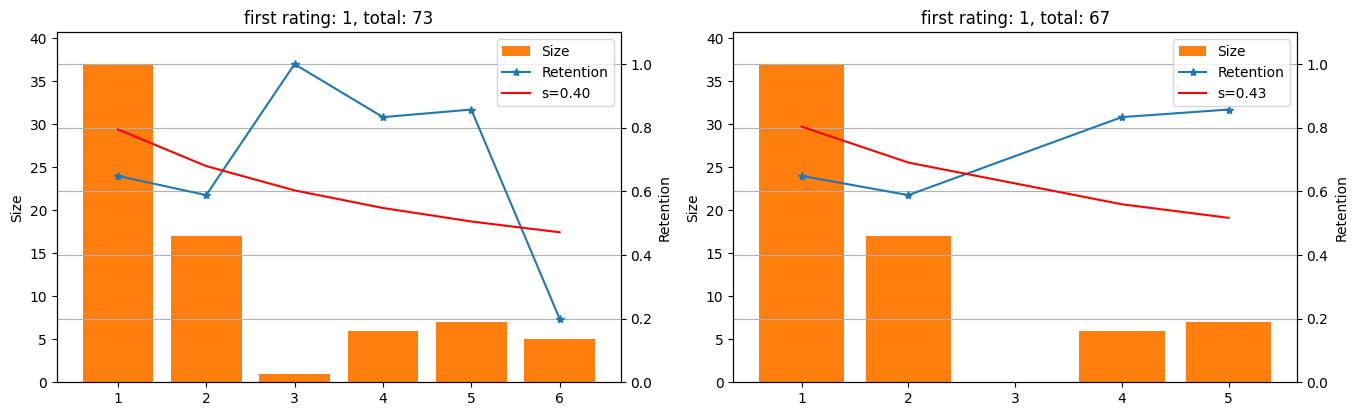

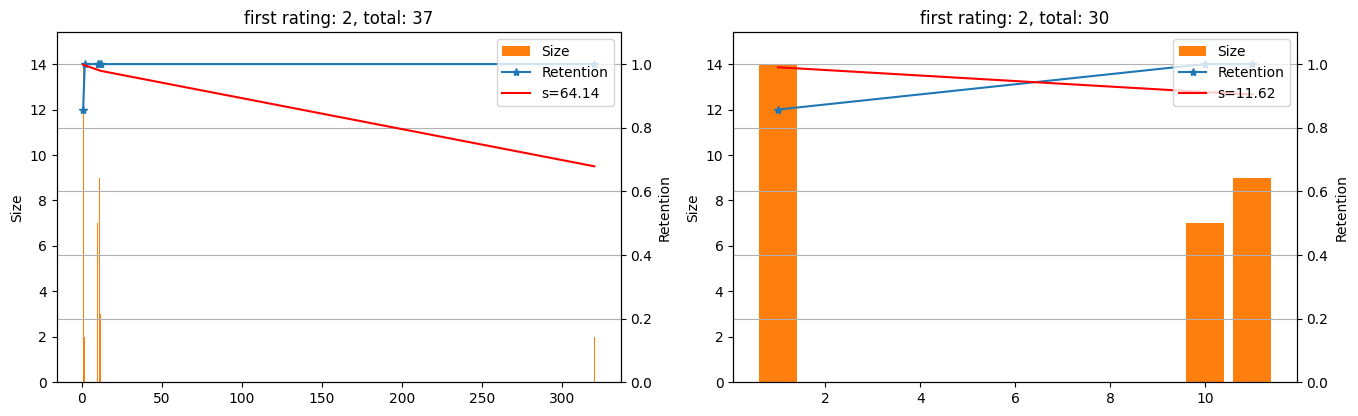

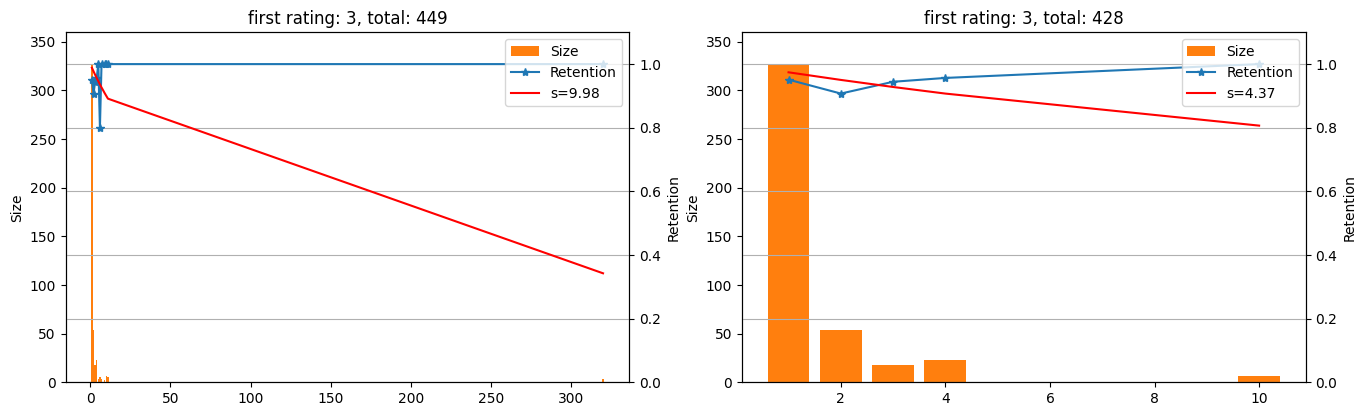

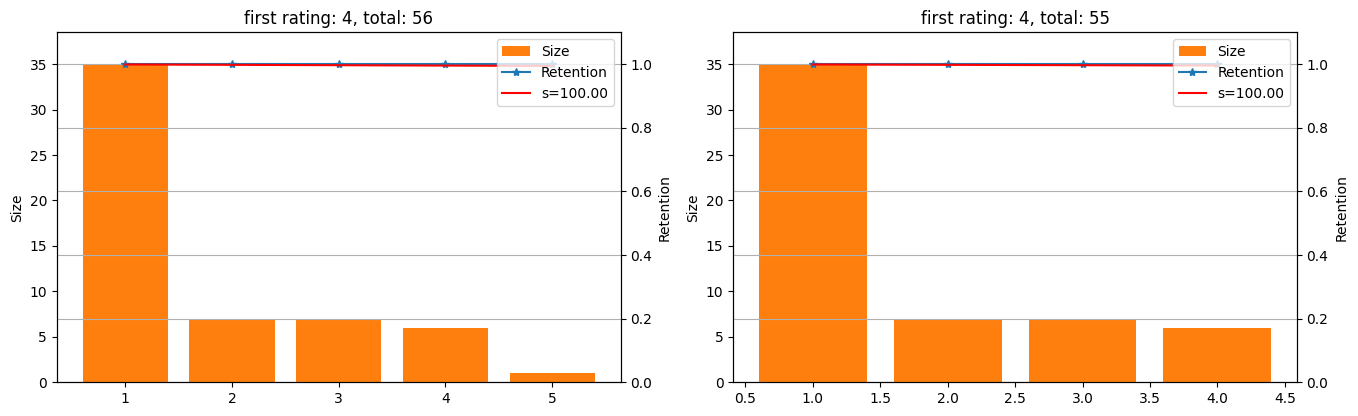

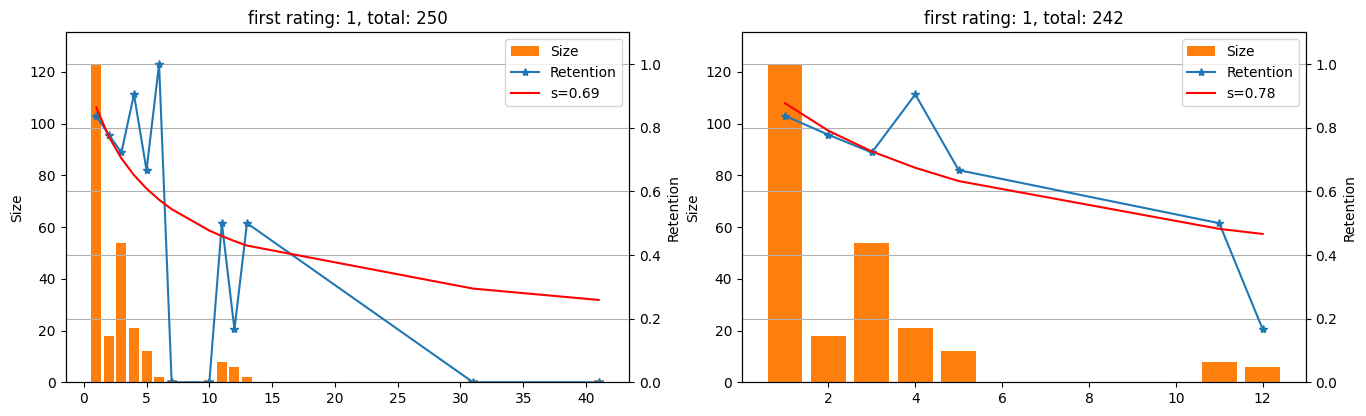

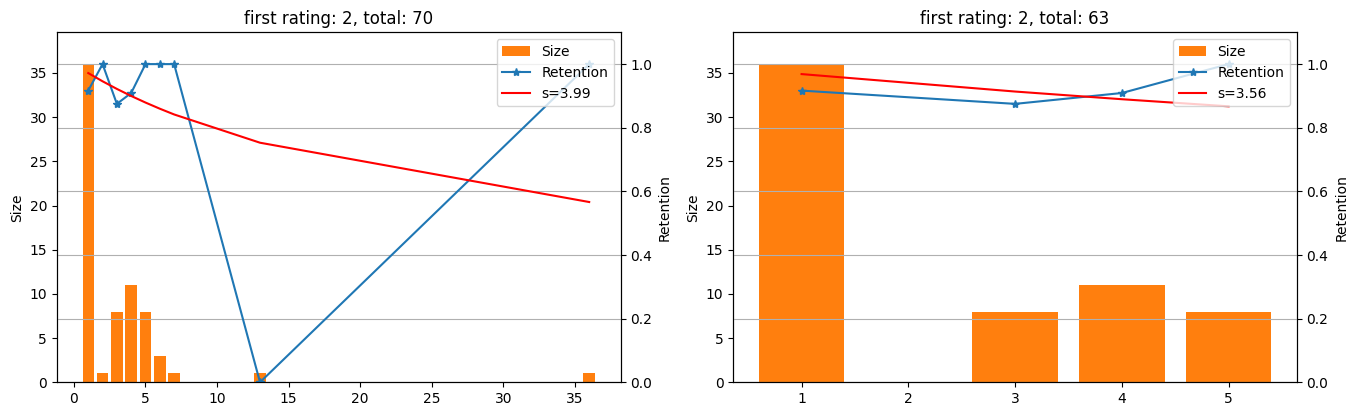

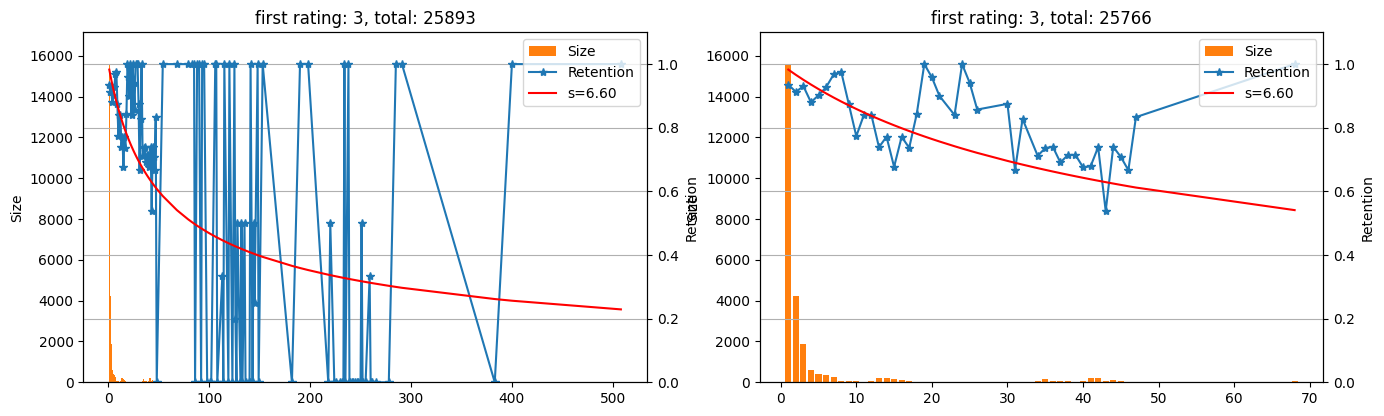

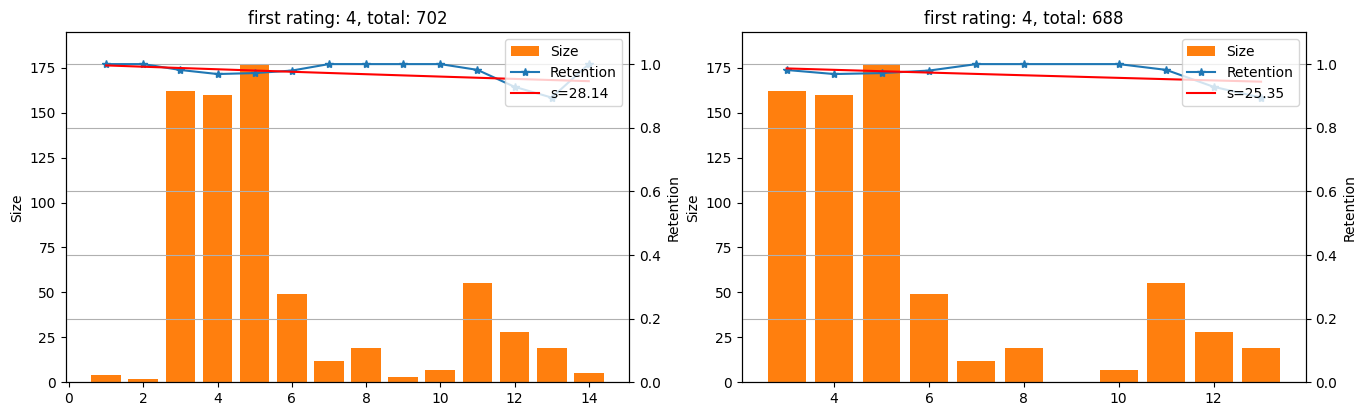

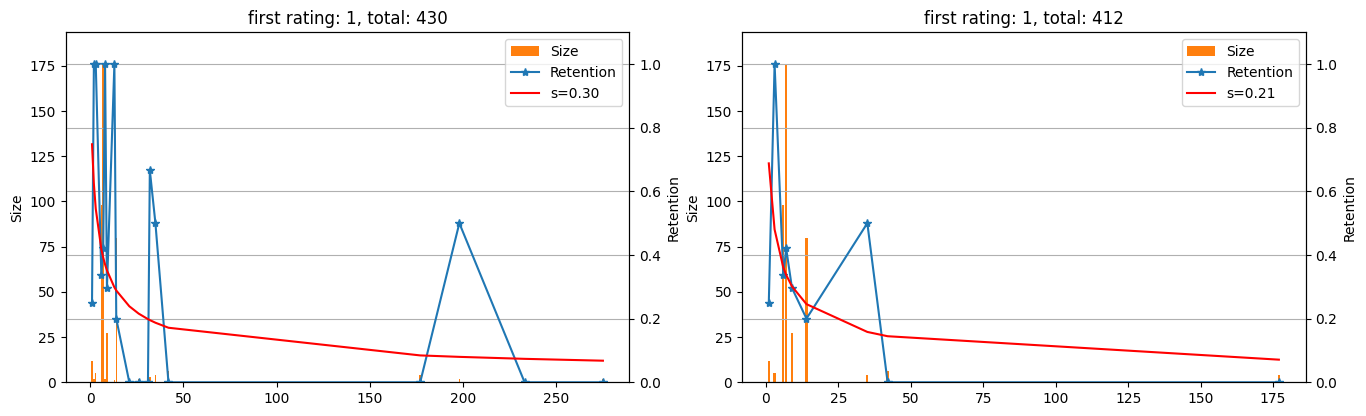

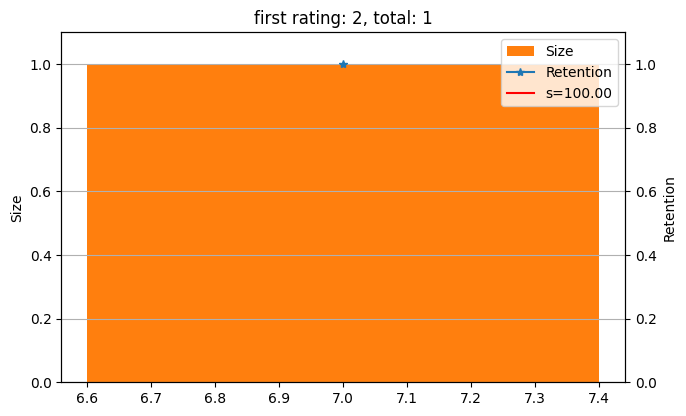

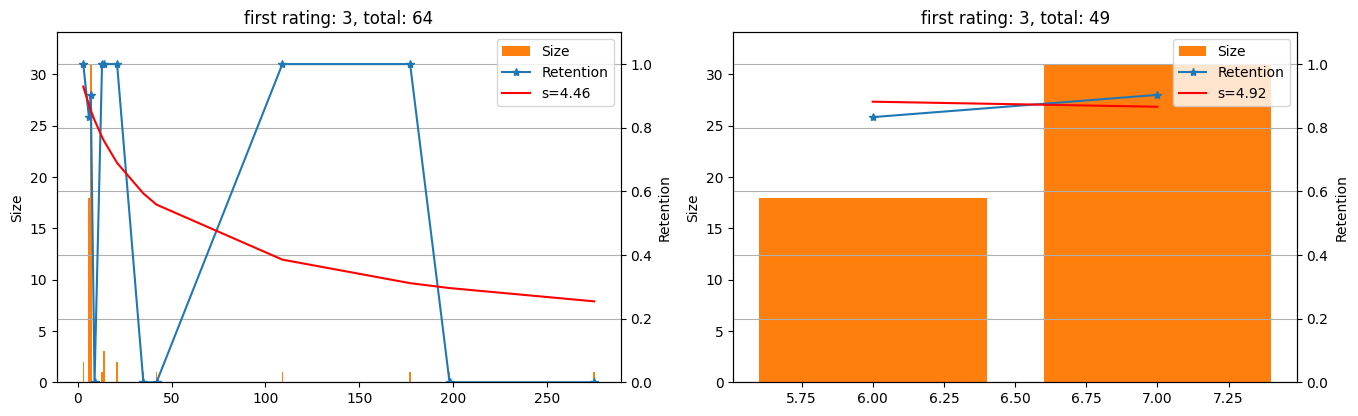

<Figure size 1600x1000 with 0 Axes>

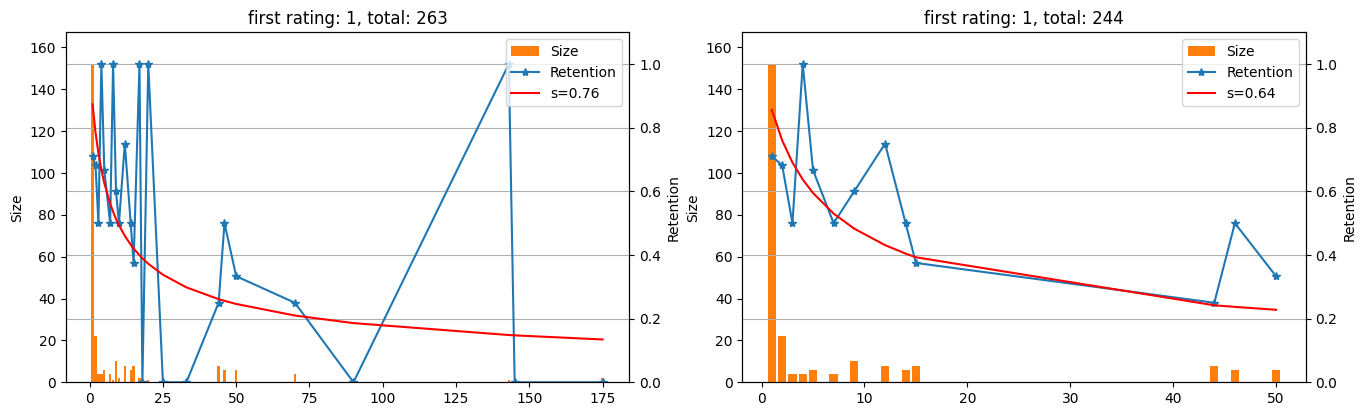

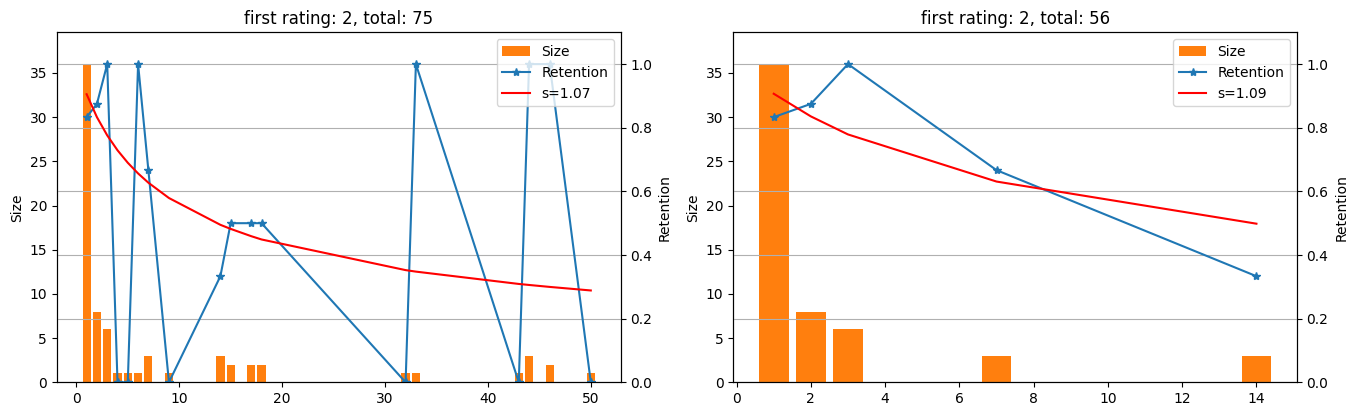

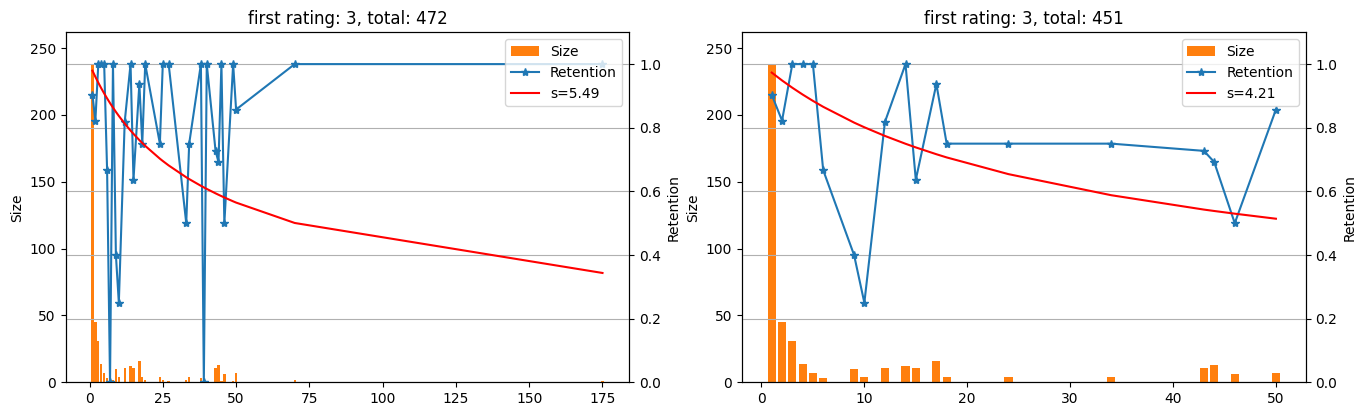

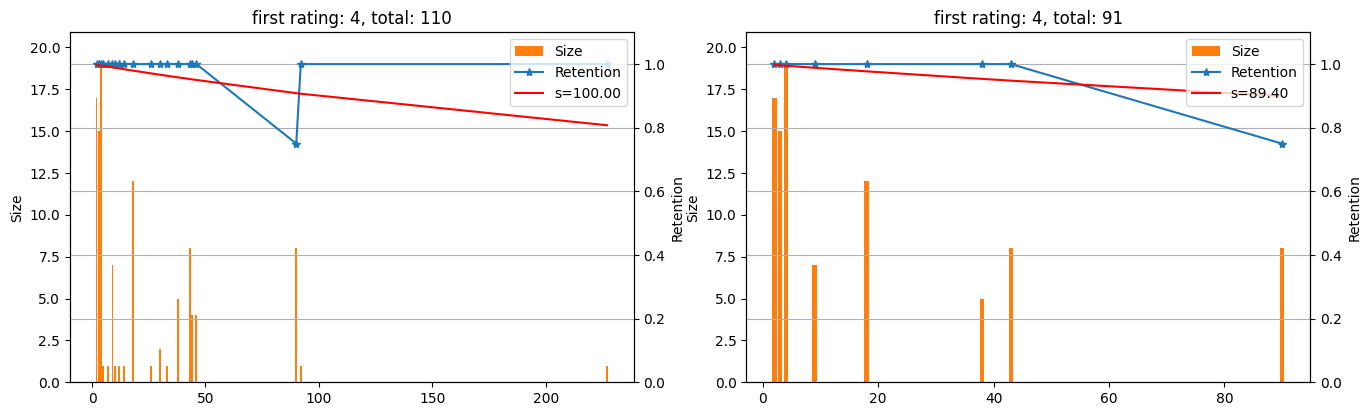

In [1]:
import pandas as pd
from pathlib import Path
from utils import *


def remove_outliers(group: pd.DataFrame) -> pd.DataFrame:
    # threshold = np.mean(group['delta_t']) * 1.5
    # threshold = group['delta_t'].quantile(0.95)
    # Q1 = group['delta_t'].quantile(0.25)
    # Q3 = group['delta_t'].quantile(0.75)
    # IQR = Q3 - Q1
    # threshold = Q3 + 1.5 * IQR
    # group = group[group['delta_t'] <= threshold]
    grouped_group = (
        group.groupby(by=["r_history", "delta_t"], group_keys=False)
        .agg({"y": ["mean", "count"]})
        .reset_index()
    )
    sort_index = grouped_group.sort_values(
        by=[("y", "count"), "delta_t"], ascending=[True, False]
    ).index

    total = sum(grouped_group[("y", "count")])
    has_been_removed = 0
    for i in sort_index:
        count = grouped_group.loc[i, ("y", "count")]
        delta_t = grouped_group.loc[i, "delta_t"].values[0]
        if has_been_removed + count >= max(total * 0.05, 20):
            break
        else:
            if count < 6 or delta_t > 100:
                group.drop(group[group["delta_t"] ==
                           delta_t].index, inplace=True)
                has_been_removed += count
    return group


sorted_files = sorted(
    Path("../fsrs-benchmark/dataset").glob("*.csv"), key=lambda x: int(x.stem)
)[:4]


for path in sorted_files:
    df = create_time_series(pd.read_csv(path))
    outlier_analysis(df, remove_outliers)